# Librerías necesarias

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__ # versión de tensorflow debe ser 2.19.0, si no actualizarla

'2.19.0'

# Leyendo los datos

In [3]:
# Cambiar nombre de datos al suyo
x1_load = np.load('Luis_X.npy')
y1_load = np.load('Luis_Y.npy')

In [4]:
x_test = np.load('x_test_fed.npy')
y_test = np.load('y_test_fed.npy')

# Entrenamiento y validación

In [5]:
from sklearn.metrics import classification_report

def train_and_verify(local_model, x_train, y_train, epochs, x_test, y_test, save_name):

    print(local_model)

    history = local_model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))
    y_pred = local_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes))

    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


    local_model.save(save_name)

<Sequential name=sequential_1, built=True>
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6434 - loss: 1.0205 - val_accuracy: 0.9686 - val_loss: 0.0982
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9495 - loss: 0.1564 - val_accuracy: 0.9792 - val_loss: 0.0646
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9634 - loss: 0.1120 - val_accuracy: 0.9829 - val_loss: 0.0474
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9735 - loss: 0.0854 - val_accuracy: 0.9853 - val_loss: 0.0491
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9788 - loss: 0.0634 - val_accuracy: 0.9854 - val_loss: 0.0432
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
     

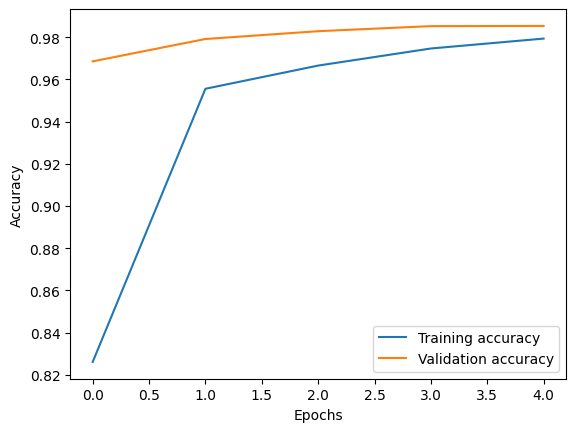

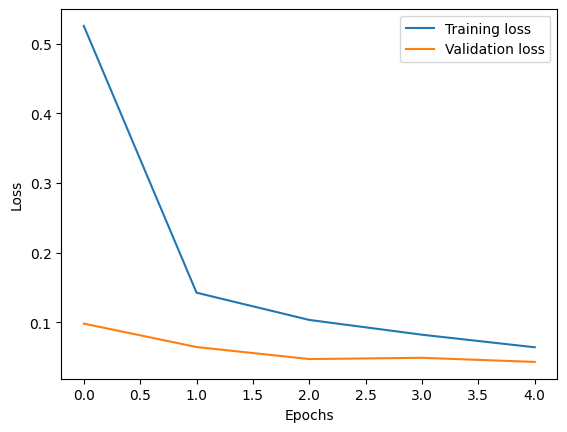

In [7]:
from TheModel import build
local_model = build.build_it()

train_and_verify(local_model, x1_load, y1_load, 5, x_test, y_test, "lmodel_Luis.keras") # cambiar nombre de modelo a guardar